# CS236781: Deep Learning

# Tutorial 1: Python and tensor basics

In this tutorial, we will cover:
* Course info 
* Environment setup with `conda`
* Jupyter: Using notebooks
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* PyTorch tensors: Brief intro to automatic differentiation

Also in this tutorial, but for self-study:
* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes


## Administration and General Info

My info:
- Aviv Rosenberg
- avivr@cs.technion.ac.il
- Office hour: Thursdays, 13:30 via Zoom.


Course:
- Website is at https://vistalab-technion.github.io/cs236781/
- Updates will be posted there (but emails will be sent via WebCourse)
- Post questions on **Piazza** only! (Not email, not facebook)
- Any questions about the **homeworks** or **tutorials** -> Post on Piazza.
- For personal requests/delays -> email Chaim.

Lectures:
- Provide a high level presentation of most core topics of Deep Learning, including very recent topics.
- Sometimes a supplementary lecture is available with more in-depth examples.
- Give mathematical background and justifications.
- Videos are available for almost all lectures (by Profs. Alex Bronstein and Avi Mendelson).

Tutorials:
- Structure is usually a short theory reminders part and then step-by-step technical implementation of a real  problem.
- Technical, meant to help you understand the implementation details behind deep learning.
- Highly relevant for success in the homework assignments.
- After this tutorial you should clone the [tutorials repo](https://github.com/vistalab-technion/cs236781-tutorials), install the conda env and play with the code.
- Videos are available (by Aviv Rosenberg).

Homework:
- Four HW assignments, quite heavy load. Best to tackle them after you have sufficient programming experience.
- Almost entirely "wet" i.e. implementation of real algorithms with real data.
- Can be done in pairs or alone.
- Some will require use of GPUs. We will provide access provide course servers.
- Read the [guidelines](https://vistalab-technion.github.io/cs236781/assignments/getting-started) and [collaboration policy](https://vistalab-technion.github.io/cs236781/info/#administration) carefully!

## Introduction

Python is a great general-purpose programming language on its own and with the addition of a few
popular libraries such as `numpy`, `scipy`, `pandas`, `scikit-learn`, `matplotlib` and others it becomes an
effective scientific computing environment.

Today it is also the most-used language for machine learning both in research and industry.

Recently many **Deep Learning frameworks** have emerged for python.
Arguably the most notable ones in 2019 are **TensorFlow** (with the Keras frontend) and **PyTorch**.

In this course we'll use PyTorch, which is currently [the leading DL framework](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry) for research.

<center><img src="https://thegradient.pub/content/images/2019/10/number_medium.png" width="700"/></center>

Many of you may have some experience with Python and numpy; for the rest of you, this notebook can serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

However, we recommend getting up to speed with python using the numerous availble online resources.

If you have previous knowledge in Matlab,
we recommend the [numpy for Matlab users](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html) page as a useful resource.

Credit: Some parts of the Python tutorial here were adapted from the [CS231n Python tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson.

## Environment setup

To install and manage all the necessary packages and dependencies for the
course tutorials and assignments, we use [conda](https://conda.io), a popular package-manager for python.

- The tutorial notebooks and homework assignments come with an `environment.yml` file which defines which third-party libraries we depend on.
- Conda will use this file to create a virtual environment for you.
- This virtual environment includes python and all other packages and tools we specified, separated from any preexisting
python installation you may have.

### Installation

1. Install the python3 version of [miniconda](https://conda.io/miniconda.html).
Follow the [installation instructions](https://conda.io/docs/user-guide/install/index.html)
for your platform.

2. Install all dependencies (into a virtual env) with `conda`:

    ```shell
    conda env update -f environment.yml
    ```
    
    This will also create a new virtual env (`cs236781-tutorials`) if it doesn't already exist.

3. To activate the virtual environment (set up `$PATH`):

    ```shell
    conda activate cs236781-tutorials
    ```

You can also check what conda environments you have and which is active, run

```shell
conda env list
```

#### Short demo of environment setup

We'll now do a quick demo of the environment installation and working with `conda`, since usually there are many questions about this.

### Running Jupyter

From a terminal, enter the folder contaning the tutorial notebooks.
1. Make sure that the active conda environment is `cs236781-tutorials`:

    ```shell
    conda activate cs236781-tutorials
    ```

2. Run jupyter with

    ```shell
    jupyter lab
    ```
    
    This will start a [jupyter lab](https://jupyterlab.readthedocs.io/en/stable/)
    server and open your browser at the local server's url. You can now start working with the notebooks.

If you're new to jupyter notebooks, you can get started by reading the
[UI guide](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
and also about how to use notebooks in
[JupyterLab](https://jupyterlab.readthedocs.io/en/latest/user/notebook.html).

**Important Note**: The course homework and tutorials use **different** conda envs! Make sure to use the correct one each time.

#### Jupyter basics

Jupyter notebooks consist mainly of code and markdown cells.
The code cells contain code that is run by a `kernel`, an
interpreter for some programming language, python in our case.

In [1]:
# This is a code cell; it can contain arbitrary python code.

foo = 'bar'
print(foo)

def the_answer():
    return 42

# The output of the last expression in a cell is shown
2*the_answer()
the_answer()

bar


42

Variables and functions defined in a code cell are available in subsequent cells.

In [2]:
ans = the_answer()

In [3]:
ans

42

This is a markdown cell. You can use markdown syntax to format your text, and also include equations
written in $\LaTeX$:

$$
e^{i\pi} - 1 = 0
$$

Other useful things to know about:
* Opening a console for notebook
* Restarting kernel
* Magics

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%timeit the_answer()

57.8 ns ± 0.696 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [6]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


Python has great [documentation](https://docs.python.org/3)! Use it often.

### Packages and modules

A python **module** is simply a python file (`.py`), which can contain functions, classes and even top-level code.

A **package** is a collection of modules within a directory. Python comes with a standard library which
includes many useful packages.

A package must be imported before use. They can be imported like so:

In [7]:
# Import packages from the python standard library
import math
import sys

Additionally, we can define our own packages and modules. This tutorial comes with a `demo_package`
which includes a `demo_module`.

Any object can be imported from a module like so:

In [8]:
# Import just a specific function from a specific module from a specific package
from demo_package.demo_module import demo_func

demo_func(math.pi)
print('FOO', file=sys.stdout)

this is a demo, a=17
this is a demo, a=3.141592653589793
FOO


### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [9]:
x = 3
print(x, type(x))

3 <class 'int'>


In [10]:
print(x + 1)  # Addition;
print(x - 1)  # Subtraction;
print(x * 2)  # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [11]:
x += 1
print(x)
x *= 2
print(x)

4
8


In [12]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2, y / 2, y // 2)

<class 'float'>
2.5 3.5 5.0 6.25 1.25 1.0


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [13]:
t, f = True, False

Now we let's look at the operations:

In [14]:
print(t and f) # Logical AND
print(t or f ) # Logical OR
print(not t  ) # Logical NOT
print(t != f ) # Logical XOR

False
True
False
True


#### Strings

In [15]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
hello, len(hello)

('hello', 5)

In [16]:
# String concatenation
'aaa ' + 'bbb'

'aaa bbb'

There are several way to created formatted strings, here are a couple:

In [17]:
s = 'hello'
a = [1,2,3]

# sprintf style string formatting
print('%s %s: pi=%.5f' % (s, a, math.pi))

# formatting with f-string literals (python 3.6+)
print(f'{s} {a}: pi={math.pi:.5f}')

hello [1, 2, 3]: pi=3.14159
hello [1, 2, 3]: pi=3.14159


String objects have a bunch of useful methods; for example:

In [18]:
s = "hello"
print(s.capitalize() ) # Capitalize a string; prints "Hello"
print(s.upper()      ) # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7)     ) # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7)    ) # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/3/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [19]:
xs = [3, 1, 2]   # Create a list
print(xs)
print(xs[2], xs[-1]) # Negative indices count from the end of the list; prints "2"

[3, 1, 2]
2 2


In [20]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [21]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [22]:
x = xs.pop()     # Remove and return the last element of the list
x, xs

('bar', [3, 1, 'foo'])

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [23]:
nums = list(range(5))
nums

[0, 1, 2, 3, 4]

In [24]:
nums[2:4]    # Get a slice from index 2 to 4 (exclusive)

[2, 3]

In [25]:
nums[2:]     # Get a slice from index 2 to the end

[2, 3, 4]

In [26]:
nums[:2]     # Get a slice from the start to index 2 (exclusive)

[0, 1]

In [27]:
nums[:]      # Get a slice of the whole list

[0, 1, 2, 3, 4]

In [28]:
nums[:-1]    # Slice indices can be negative

[0, 1, 2, 3]

In [29]:
nums[0:4:2]  # Can also specify slice step size

[0, 2]

In [30]:
nums[2:4] = [8, 9] # Assign a new sublist to a slice
nums

[0, 1, 8, 9, 4]

In [31]:
# Delete elements from a list
nums[0:1] = []
del nums[-1]
nums

[1, 8, 9]

#### Loops

You can loop over the elements of a list like this:

In [32]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [33]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(f'#{idx+1}: {animal}')

#1: cat
#2: dog
#3: monkey


#### List comprehensions

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [34]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
squares

[0, 1, 4, 9, 16]

You can make this code simpler using a list comprehension:

In [35]:
squares = [x ** 2 for x in nums]
squares

[0, 1, 4, 9, 16]

List comprehensions can also contain conditions:

In [36]:
even_squares = [x ** 2 for x in nums if x % 2 == 0]
even_squares

[0, 4, 16]

List comprehensions can be nested:

In [37]:
nums2 = [-1, 1]
[x * y for x in nums for y in nums2]

[0, 0, -1, 1, -2, 2, -3, 3, -4, 4]

#### Dictionaries

A dictionary stores (key, value) pairs. In other languages this is known as a `Map` or `Hash`.

In [38]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary
print('cat' in d)     # Check if a dictionary has a given key

cute
True


In [39]:
d['fish'] = 'wet'    # Set an entry in a dictionary
d

{'cat': 'cute', 'dog': 'furry', 'fish': 'wet'}

In [40]:
# Trying to access a non-existing key raises a KeyError
try:
    d['monkey']
except KeyError as e:
    print(e, file=sys.stderr)

'monkey'


In [41]:
print(d.get('monkey', 'N/A'))  # Get an element with a default
print(d.get('fish', 'N/A'))    # Get an element with a default

N/A
wet


In [42]:
del d['fish']        # Remove an element from a dictionary
d

{'cat': 'cute', 'dog': 'furry'}

In [43]:
# Iteration over keys
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    print(f'A {animal} has {d[animal]} legs')

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


In [44]:
# Iterate over key-value pairs
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, num_legs in d.items():
    print(f'A {animal} has {num_legs} legs')

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


In [45]:
# Create a dictionary using the built-in dict() function
dict(foo=1, bar=2, baz=3)

{'foo': 1, 'bar': 2, 'baz': 3}

#### Dictionary comprehensions

These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [46]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
even_num_to_square

{0: 0, 2: 4, 4: 16}

#### Sets

A set is an unordered collection of distinct elements

In [47]:
animals = {'cat', 'dog'}
print(animals)
print('cat' in animals )  # Check if an element is in a set
print('fish' in animals) # prints "False"

{'dog', 'cat'}
True
False


In [48]:
animals.add('fish') # Add an element to a set
print('fish' in animals)
len(animals) # Number of elements in a set

True


3

In [49]:
animals.add('cat')       # Adding an element that is already in the set does nothing
animals

{'cat', 'dog', 'fish'}

_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [50]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print(f'#{idx}: {animal}')

#0: dog
#1: cat
#2: fish


#### Set comprehensions

Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [51]:
from math import sqrt
s = {int(sqrt(x)) for x in range(37)}
s

{0, 1, 2, 3, 4, 5, 6}

#### Tuples

A tuple is an **immutable** ordered list of values.

In [52]:
t = (1, 2, 'three')
t

(1, 2, 'three')

It can be used in ways similar to a list:

In [53]:
t[0:1], t[1:3], t[-1], len(t)

((1,), (2, 'three'), 'three', 3)

A tuple can be used a key in a dictionary and as an element of a sets, while **lists cannot**.

In [54]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
d

{(0, 1): 0,
 (1, 2): 1,
 (2, 3): 2,
 (3, 4): 3,
 (4, 5): 4,
 (5, 6): 5,
 (6, 7): 6,
 (7, 8): 7,
 (8, 9): 8,
 (9, 10): 9}

A tuple (and also a list) can be **unpacked**:

In [55]:
one, two, three = t
one, two, three

(1, 2, 'three')

Note that when retuning multiple values from a function (or code block in a jupyter notebook, as above)
your values get wrapped in a tuple, and the tuple is what's returned.
Unpacking the return value of a function can make it seem as if multiple values were returned.

### Functions

Python functions are defined using the `def` keyword. For example:

In [56]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [57]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


#### Positional and Keyword arguments

Python functions are very flexible in the way they accept arguments. Both positional (regular) and keyword
arguments are supported and can be mixed in the same definition. Additionally, extra arguments can be passed in with the `*args` and `**kwargs` constructs.

Here's a function with three positional arguments and three keyword arguments which also accepts extra 
positional and keyword arguments.

In [58]:
def myfunc(a1, a2, a3, *extra_args, kw1='foo', kw2='bar', kw3=3, **extra_kwargs):
    print(f'Got positional args: {(a1, a2, a3)}')
    print(f'Got keyword args   : {dict(kw1=kw1, kw2=kw3, kw3=kw3)}')
    print(f'Got extra positional args: {extra_args}')
    print(f'Got extra keyword args: {extra_kwargs}')

It can be called in many ways:

In [59]:
myfunc(1,2,3,4,5,6)

Got positional args: (1, 2, 3)
Got keyword args   : {'kw1': 'foo', 'kw2': 3, 'kw3': 3}
Got extra positional args: (4, 5, 6)
Got extra keyword args: {}


In [60]:
my_args = [1,2,3,4]
myfunc(*my_args)

Got positional args: (1, 2, 3)
Got keyword args   : {'kw1': 'foo', 'kw2': 3, 'kw3': 3}
Got extra positional args: (4,)
Got extra keyword args: {}


In [61]:
myfunc(1,2,3, kw3=3, kw2=2, foo='bar')

Got positional args: (1, 2, 3)
Got keyword args   : {'kw1': 'foo', 'kw2': 3, 'kw3': 3}
Got extra positional args: ()
Got extra keyword args: {'foo': 'bar'}


In [62]:
my_kwargs = dict(kw1=1, kw2=2, kw3=3, kw4=4)
myfunc(1,2,3, **my_kwargs)

Got positional args: (1, 2, 3)
Got keyword args   : {'kw1': 1, 'kw2': 3, 'kw3': 3}
Got extra positional args: ()
Got extra keyword args: {'kw4': 4}


Note that keyword args can be omitted, while positional args cannot:

In [63]:
try:
    myfunc(1,2)
except TypeError as e:
    print(e, file=sys.stderr)

myfunc() missing 1 required positional argument: 'a3'


### Classes

The syntax for defining classes in Python is straightforward:

In [64]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method
g.greet(loud=True)   # Call an instance method

Hello, Fred
HELLO, FRED!


Classes can implement special **magic functions** that enable them to be integrated nicely with other python code. Magic functions have special names that start and end with `__`.

For example, here's a class that can be indexed with `[]` and iterated over with a `for` loop.

In [65]:
class ExampleCollection(object):
    def __init__(self):
        self.items = [100, 200, 300]
    
    def __len__(self):
        return len(self.items)
    
    def __getitem__(self, idx):
        return self.items[idx]
    
    def __iter__(self):
        class ExampleIter():
            def __init__(self, collection):
                self.idx = 0
                self.collection = collection
                
            def __next__(self):
                if self.idx >= len(self.collection):
                    raise StopIteration()
                x = self.collection[self.idx]
                self.idx += 1
                return x
                
        return ExampleIter(self)
    

In [66]:
example = ExampleCollection()
print('length=', len(example)) # invokes __len__
print('example[0]=', example[0]) # invokes __getitem__

length= 3
example[0]= 100


In [67]:
for x in example: # invokes __iter__ and it's __next__
    print(x)

100
200
300


Many other magic functions exist. Consult the docs and see if you can catch 'em all!

## Numpy

Numpy is a core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

We'll refer to such n-dimentional arrays as **tensors** in accordance with the deep learning terminology.

Although we'll mainly use PyTorch tensors for implementing our Deep Learning systems, it's still important to be proficient with `numpy`, since:
1. They concepts are very similar. It will help you understand numpy ndarrays you'll understand Pytorch Tensors.
1. You'll find that you constantly need to switch between the two when working with read DL systems.

To use Numpy, we first need to import the `numpy` package:

In [68]:
import numpy as np

### Arrays

A numpy array represents an n-dimentional grid of values, all of the same type, and is indexed by a tuple of nonnegative integers.

- The number of dimensions is the **rank** of the array
- The **shape** of an array is a tuple of integers giving the size of the array along each dimension

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [69]:
a = np.array([1, 2, 3])  # Create a rank 1 array
a

array([1, 2, 3])

In [70]:
a[0]

1

Two very important properties of any numpy array are its `shape` and `dtype`.

In [71]:
def print_arr(arr, pre_text=''):
    print(f'{pre_text}{arr} shape={arr.shape} dtype={arr.dtype}')

In [72]:
print_arr(a)

[1 2 3] shape=(3,) dtype=int64


In [73]:
a[0] = 5                 # Change an element of the array
a

array([5, 2, 3])

In [74]:
b = np.array([[1,2,3],[4,5,6.7]])   # Create a rank 2 array
print_arr(b)

[[1.  2.  3. ]
 [4.  5.  6.7]] shape=(2, 3) dtype=float64


In [75]:
b[0, 0], b[0, 1], b[1, 0]

(1.0, 2.0, 4.0)

Numpy also provides many functions to create arrays:

In [76]:
np.zeros((2,2))  # Create an array of all zeros

array([[0., 0.],
       [0., 0.]])

In [77]:
np.ones((1,10))   # Create an array of all ones

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [78]:
np.full((3,3), 7.2) # Create a constant array

array([[7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2]])

In [79]:
np.eye(4, dtype=np.int) # Create an identity matrix of integers

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [80]:
t = np.random.random((4,4,3)) # Create a 3d-array filled with U[0,1] random values
t

array([[[0.2921258 , 0.24006649, 0.23524194],
        [0.56366047, 0.4995275 , 0.20002408],
        [0.47389455, 0.34404009, 0.68361653],
        [0.08139262, 0.79519983, 0.65434979]],

       [[0.90760698, 0.91360047, 0.28917267],
        [0.17707201, 0.77497188, 0.23779307],
        [0.30314564, 0.53994754, 0.44529332],
        [0.7696943 , 0.34824743, 0.05239993]],

       [[0.90530652, 0.88348097, 0.06298633],
        [0.71455082, 0.02842012, 0.69930837],
        [0.11367997, 0.65028055, 0.7401248 ],
        [0.35031805, 0.38855514, 0.73895394]],

       [[0.49212267, 0.64264279, 0.85956355],
        [0.00288318, 0.7168229 , 0.59040233],
        [0.9000205 , 0.3173138 , 0.97523596],
        [0.80869504, 0.49756894, 0.14186037]]])

In [81]:
t[1,1,2]

0.23779306550328616

#### Array rank

In `numpy` **rank** means **number of dimensions**.

**rank-0** arrays are scalars.

In [82]:
a0 = np.array(17)
print_arr(a0)

17 shape=() dtype=int64


In [83]:
# Get sclar as a python float
a0.item()

17

**rank-1** arrays of length `n` have a shape of `(n,)`. 

In [84]:
# A rank-1 array
a1 = np.array([1,2,3])

print_arr(a1)

[1 2 3] shape=(3,) dtype=int64


In [85]:
# A rank-1 array scalar
print_arr(np.array([3.14]))

[3.14] shape=(1,) dtype=float64


**rank-2** arrays have a shape of `(n,m)`. 

In [86]:
a2 = np.array([[1,2,3], [4,5,6]])

print_arr(a2)

[[1 2 3]
 [4 5 6]] shape=(2, 3) dtype=int64


In [87]:
# A column vector is also rank-2!
a_col = a1.reshape(-1, 1)

print_arr(a_col)

[[1]
 [2]
 [3]] shape=(3, 1) dtype=int64


In [88]:
# A row vector is also rank-2
a_row = a1.reshape(1, -1)

print_arr(a_row)

[[1 2 3]] shape=(1, 3) dtype=int64


**rank-k** arrays have a shape of `(n1,...,nk)`. 

In [89]:
print_arr(np.zeros((2,3,4)))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]] shape=(2, 3, 4) dtype=float64


In [90]:
print_arr(np.ones((2,2,2,2)))

[[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]] shape=(2, 2, 2, 2) dtype=float64


### Array math

#### Elementwise operations
Basic mathematical functions **operate elementwise** on arrays, and are available both as operator overloads and as functions in the numpy module:

In [91]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise basic math
print(x + y)
print(x - y)
print(x * y)
print(x / y)

[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [92]:
# Elementwise functions
print(np.sqrt(x))
print(np.exp(x))
print(np.log(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]
[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]
[[0.         0.69314718]
 [1.09861229 1.38629436]]


There are of course many more elementwise operations inmplemented by `numpy`.

#### Inner products

Unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication (as we saw above).

We can instead use the `dot()` function to:
- compute inner products of vectors,
- multiply a vector by a matrix, and to
- multiply matrices, and more generally n-d tensors.

The `dot()` function is available both as a function in the numpy module and as an instance
method of array objects.

In [93]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


Rank-1 arrays arrays are somewhat special in that `numpy` can treat them both as column or as row vectors.
Arrays of different rank have different semantics when using them in vector-vector or vector-matrix products, so always make sure you known what shapes you're working with:

In [94]:
print_arr(np.dot(a1, a1), 'a1 * a1 =\t')

print_arr(np.dot(a_row, a1), 'a_row * a1 =\t')

print_arr(np.dot(a1, a_col), 'a1 * a_col =\t')

print_arr(np.dot(a_row, a_col), 'a_row * a_col =\t')

print_arr(np.dot(a_col, a_row), 'a_col * a_row =\n')

a1 * a1 =	14 shape=() dtype=int64
a_row * a1 =	[14] shape=(1,) dtype=int64
a1 * a_col =	[14] shape=(1,) dtype=int64
a_row * a_col =	[[14]] shape=(1, 1) dtype=int64
a_col * a_row =
[[1 2 3]
 [2 4 6]
 [3 6 9]] shape=(3, 3) dtype=int64


#### Non-elementwise operations

Numpy provides many useful functions for performing computations on arrays.

In [95]:
x = np.array([[1,2],[3,4]])
print_arr(x)

[[1 2]
 [3 4]] shape=(2, 2) dtype=int64


In [96]:
print(np.sum(x))  # Compute sum of all elements
print(np.mean(x, axis=0))  # Compute mean of each column
print(np.prod(x, axis=1) ) # Compute product of each row

10
[2. 3.]
[ 2 12]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

### Array indexing

Numpy offers several ways to index into arrays.

**Slicing**

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify **a slice for each dimension** of the array:

In [97]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print_arr(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] shape=(3, 4) dtype=int64


In [98]:
b = a[:2, 1:3]

print_arr(b)

[[2 3]
 [6 7]] shape=(2, 2) dtype=int64


A slice of an array is a **view** into the same in-memory data, so modifying it will modify the original array.

In [99]:
# Changing a view
b[0, 0] = 77777

# ...modifies original
a

array([[    1, 77777,     3,     4],
       [    5,     6,     7,     8],
       [    9,    10,    11,    12]])

You can also mix integer indexing with slice indexing.
However, doing so will yield an array of **lower rank** than the original array.


In [100]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Two ways of accessing the data in the middle row of the array.
- Mixing integer indexing with slices yields an array of lower rank
- Using only slices yields an array of the same rank as the original array

In [101]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a

print_arr(row_r1)
print_arr(row_r2)
print_arr(row_r3)

[5 6 7 8] shape=(4,) dtype=int64
[[5 6 7 8]] shape=(1, 4) dtype=int64
[[5 6 7 8]] shape=(1, 4) dtype=int64


In [102]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print_arr(col_r1)
print_arr(col_r2)

[ 2  6 10] shape=(3,) dtype=int64
[[ 2]
 [ 6]
 [10]] shape=(3, 1) dtype=int64


**Integer array indexing** 

- When you slice, the resulting array view will always be a subarray of the original array.
- Integer array indexing allows you to construct arbitrary arrays using the data from another array.


In [103]:
a = np.array([[1,2], [3, 4], [5, 6]])
print_arr(a)

[[1 2]
 [3 4]
 [5 6]] shape=(3, 2) dtype=int64


In [104]:
# An example of integer array indexing.
# The returned array will have shape (3,)
print_arr(a[ [0, 1, 2], [0, 1, 0] ])

[1 4 5] shape=(3,) dtype=int64


In [105]:
# The above example of integer array indexing is equivalent to this:
print_arr(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5] shape=(3,) dtype=int64


In [106]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [107]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [108]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
a[np.arange(4), b]

array([ 1,  6,  7, 11])

In [109]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 1000
a

array([[1001,    2,    3],
       [   4,    5, 1006],
       [1007,    8,    9],
       [  10, 1011,   12]])

**Boolean array indexing**

This type of indexing is used to select the elements of an array that satisfy some condition
(similar to MATLAB's logical indexing).

In [110]:
a = np.array([[1,2], [3, 4], [5, 6]])
print_arr(a)

[[1 2]
 [3 4]
 [5 6]] shape=(3, 2) dtype=int64


In [111]:
bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

bool_idx

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [112]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
a[a>2]

array([3, 4, 5, 6])

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [113]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

x.dtype, y.dtype, z.dtype

(dtype('int64'), dtype('float64'), dtype('int64'))

You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Changing and adding dimensions

You can **transpose** dimensions within an array using arbitrary axis permutations.

In [114]:
a = np.ones((3, 5))
print_arr(a.transpose()) # also a.T

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] shape=(5, 3) dtype=float64


In [115]:
a = np.ones((2, 4, 6))
a[1,2,3] = 777

print_arr(a.transpose(1,0,2))

[[[  1.   1.   1.   1.   1.   1.]
  [  1.   1.   1.   1.   1.   1.]]

 [[  1.   1.   1.   1.   1.   1.]
  [  1.   1.   1.   1.   1.   1.]]

 [[  1.   1.   1.   1.   1.   1.]
  [  1.   1.   1. 777.   1.   1.]]

 [[  1.   1.   1.   1.   1.   1.]
  [  1.   1.   1.   1.   1.   1.]]] shape=(4, 2, 6) dtype=float64


Note that an element `[x,y,z]` moves to position `[y,x,z]` after a transpose with this permutation (1,0,2).

Another important feature is **reshaping** an array into different dimensions.

In [116]:
a = np.ones((3, 6))
print_arr(np.reshape(a, (2, 9)))

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]] shape=(2, 9) dtype=float64


When reshaping, we need to make sure to preserve the same number of elements.
Use `-1` in one of the dimensions to tell numpy to "figure it out".

You can also combine multiple arrays with **concatenation** along an arbitrary axis.

In [117]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print_arr(a)
print_arr(b)

[[1 2]
 [3 4]] shape=(2, 2) dtype=int64
[[5 6]] shape=(1, 2) dtype=int64


In [118]:
print_arr(np.concatenate((a, b), axis=0))

[[1 2]
 [3 4]
 [5 6]] shape=(3, 2) dtype=int64


In [119]:
print_arr(np.concatenate((a, b.T), axis=1))

[[1 2 5]
 [3 4 6]] shape=(2, 3) dtype=int64


In [120]:
print_arr(np.concatenate((a, b), axis=None))

[1 2 3 4 5 6] shape=(6,) dtype=int64


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of **different shapes** when performing arithmetic operations.

Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix.

In [121]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

print_arr(x,'x=\n')
print_arr(v, 'v=')

x=
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] shape=(4, 3) dtype=int64
v=[1 0 1] shape=(3,) dtype=int64


**Naïve approach**: Use a loop.

In [122]:
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This works; however computing explicit loops in Python is **slow**. 

**Naïve approach 2**: adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`.

We could implement this approach like this:

In [123]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
vv

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [124]:
y = x + vv  # Add x and vv elementwise
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Nice, but a new array was allocated and memory was copied.

**Numpy broadcasting** allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [125]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

# Add v to each row of x using broadcasting
y = x + v  

print('shapes: ', x.shape, v.shape)
y

shapes:  (4, 3) (3,)


array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works **as if** v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. All input arrays with ndim smaller than the input array of largest ndim, have **1’s prepended to their shapes**.
1. The size in each dimension of the **output shape** is the maximum of all the input sizes in that dimension.
1. An input can be used in the calculation if its size in a particular **dimension either matches** the output size in that dimension, **or has value exactly 1**.
1. If an input has a dimension size of 1 in its shape, the **first data entry in that dimension will be used for all calculations** along that dimension. In other words, the stepping machinery of the ufunc will simply not step along that dimension (the stride will be 0 for that dimension).

In our example:
- `x` has shape `(4,3)`
- `v` has shape `(3,)`.

Following the Broadcasting logic, we can say the following is equivalent to what happened:
1. `v` has less dims than `x` so a dimension of `1` is **prepended** -> `v` is now `(1, 3)`.
1. Output shape will be `(max(1,4), max(3,3)) = (4,3)`.
1. Dim 1 of `v` matches exactly (3); dim 0 is exactly 1, so we can use the first data entry (row 0) for each time any row is accessed. This is effectively like converting `v` from `(1,3)` to `(4,3)` by replicating.

Broadcasting is incredibly useful and necessary for writing **vectorized** code,
i.e. code that avoids explicit python loops which are very slow.
Instead, this approach leveraged the underlying C implementation of numpy.

For more on broadcasting, see the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [126]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
print_arr(v)
print_arr(w)

[1 2 3] shape=(3,) dtype=int64
[4 5] shape=(2,) dtype=int64


In [127]:
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

# (3,1) * (2,) -> (3,1) * (1, 2) -> (3, 2) * (3, 2)
np.reshape(v, (3, 1)) * w

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

In [128]:
# Multiply a matrix by a constant:
x = np.ones((2,3))

# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3).

# (2,3) * () -> (2,3) * (1,1) -> (2,3) * (2,3)
x * 2

array([[2., 2., 2.],
       [2., 2., 2.]])

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## PyTorch Tensors

In [129]:
import torch
torch.__version__

'1.6.0'

PyTorch is a relatively new yet widely used deep learning framework.

During the course we'll use it extensively and learn many parts of its API.
You should also familiarize yourself with the [PyTorch Documentation](https://pytorch.org/docs/stable/) as it will greatly assist you when implementing your own models.

This notebook will show only **a small part** of PyTorch's API, the `Tensor` class.
This class is very similar to numpy's `ndarray`, and provides much of the same functionality.
However, it also has two important distinctions:
- Support for GPU computations.
- Can store extra data needed for implementing **automatic differentiation** used for back propagation:
    - A tensor of the same dimentions containing the gradient of this tensor w.r.t. some number (e.g. loss).
    - A node representing an operation in the computational graph that produced this tensor.

In the next tutorials we will examine these concepts further.

This notebook will show some brief examples, just to get a feel for it and compare it to the usual numpy `ndarray`s.

You will be using both PyTorch tensors and numpy `ndarray`s extensively throughout the course homework assignments, and in general when implementing deep learning algorithms.

In [130]:
# Basic tensor creation
t = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

print_arr(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) shape=torch.Size([2, 3]) dtype=torch.float32


Some other tensor construction methods:

In [131]:
torch.zeros((1,2))

tensor([[0., 0.]])

In [132]:
torch.ones((3,2))

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [133]:
torch.randint(10, (4,1))

tensor([[4],
        [7],
        [2],
        [3]])

As in numpy, tensors can be reshaped

In [134]:
t.reshape(3, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In many cases, PyTorch provides the same methods on both the `Tensor` object and via the `torch` package.

In [135]:
torch.reshape(t, (-1,))

tensor([1., 2., 3., 4., 5., 6.])

As in numpy, many functions are provided for computations over tensors, for example,

In [136]:
print_arr(torch.mean(t, dim=1))

tensor([2., 5.]) shape=torch.Size([2]) dtype=torch.float32


Sometime it's necessary to preserve original dimensions:

In [137]:
print_arr(torch.mean(t, dim=1, keepdim=True))

tensor([[2.],
        [5.]]) shape=torch.Size([2, 1]) dtype=torch.float32


Properties of a tensor:

In [138]:
print('shape:', t.shape)   # t.shape works like in numpy
print('also shape:', t.size())
print('dimensions:', t.dim())
print('type:', t.type())
print('device:', t.device)

shape: torch.Size([2, 3])
also shape: torch.Size([2, 3])
dimensions: 2
type: torch.FloatTensor
device: cpu


**Slicing** works just like in numpy:

In [139]:
t = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [140]:
t[:, -1]

tensor([3., 6., 9.])

In [141]:
t[:2, :]

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [142]:
t[-1:, -1:]

tensor([[9.]])

Unlike numpy, PyTorch tensors can be moved to **GPU** memory (if a GPU is available on the machine).

In [143]:
if torch.cuda.is_available():
    t = t.cuda()

In [144]:
# Better way to use GPU tensors (and later - models)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

t = t.to(device)
print(f'{device=}')

device=device(type='cpu')


**Adding dimentions**

In [145]:
print_arr(t)

# Add a new dimention as the first one
tt = t.unsqueeze(0)
print_arr(tt)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) shape=torch.Size([3, 3]) dtype=torch.float32
tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]]) shape=torch.Size([1, 3, 3]) dtype=torch.float32


In [146]:
# Add a new dimension using slicing
t[:, None, :].shape

torch.Size([3, 1, 3])

**Broadcasting** also works (with almost identical semantics):

In [147]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])

print_arr(x)
print_arr(v)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]) shape=torch.Size([4, 3]) dtype=torch.int64
tensor([1, 0, 1]) shape=torch.Size([3]) dtype=torch.int64


In [148]:
y = x + v  # Add v to each row of x using broadcasting
y

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])

Many useful mathematical functions are available in the `torch` namespace

In [149]:
print_arr(torch.exp(t))
print_arr(torch.sin(t))

print_arr(torch.softmax(t, dim=1))
print_arr(torch.relu(t))

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [5.4598e+01, 1.4841e+02, 4.0343e+02],
        [1.0966e+03, 2.9810e+03, 8.1031e+03]]) shape=torch.Size([3, 3]) dtype=torch.float32
tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794],
        [ 0.6570,  0.9894,  0.4121]]) shape=torch.Size([3, 3]) dtype=torch.float32
tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]]) shape=torch.Size([3, 3]) dtype=torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) shape=torch.Size([3, 3]) dtype=torch.float32


### Automatic differentiation

The most important aspect which sets `pytorch` appart from `numpy` is the **automatic differentiation**.

Pytorch can automatically *track* computations performed on tensors to build a *computation graph* which can be used for applying the chain rule in order to compute arbitrary derivatives.

In the remainder of the course we'll go deeper, and use this ability extensively to train neural networks via the back-propagation algorithm.

For now, we'll only show a short demo of this functionality.

In [150]:
# Tell pytorch to track operations w.r.t. this tensor
w = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
w

tensor([1., 2., 3.], requires_grad=True)

In [151]:
# Do some arbitrary calculations with w
x = 2*w
y = torch.exp(-x)
z = y ** 3 - 2

# Aggregate so that we get a scalar
l = torch.sum(z)
l

tensor(-5.9975, grad_fn=<SumBackward0>)

Notice the `grad_fn` property which appeared. Let's see what we can now do.

In [152]:
from torch import autograd

# This is where the magic happens
w_grad = autograd.grad(l, w)
w_grad

(tensor([-1.4873e-02, -3.6865e-05, -9.1380e-08]),)

What does each element of `w_grad` contain?

Each element $i$ of `w_grad` is actually the derivative of `l` with respect to that element in `w`!

In other words,

$$
\left[\mathtt{w_{grad}}\right]_i=\frac{\partial \ell}{\partial w_i}.
$$

How did this happen?

When we used `w` for calculations a computation graph was constructed behind the scenes.
This graph contains the intermediate results required to compute the derivative via the chain rule:

$$
\frac{\partial \ell}{\partial \bb{w}} = \frac{\partial \ell}{\partial \bb{z}}\frac{\partial \bb{z}}{\partial \bb{y}}\frac{\partial \bb{y}}{\partial \bb{x}}\frac{\partial \bb{x}}{\partial \bb{w}}
$$


We'll explore this in greater detail over the next tutorials. For now, lets look at the computation graph:

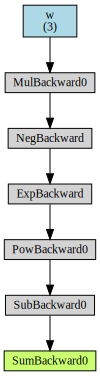

In [153]:
import torchviz

torchviz.make_dot(l, params=dict(w=w))